In [4]:
%matplotlib inline

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
from sklearn import metrics
import random

In [7]:
backbone = 'senet50'

In [8]:
face_embeddings = pd.read_pickle(f'faces_leg55_embeddings_{backbone}.pkl')

In [9]:
face_embeddings.shape

(8638, 4)

## Quantity of Pictures Histogram

In [10]:
qtd_images = face_embeddings[["name", "file"]].groupby('name').count()
qtd_images.describe()

,file
count,514.000000
mean,16.805447
std,6.446140
min,1.000000
25%,12.000000
50%,17.000000
75%,22.000000
max,31.000000


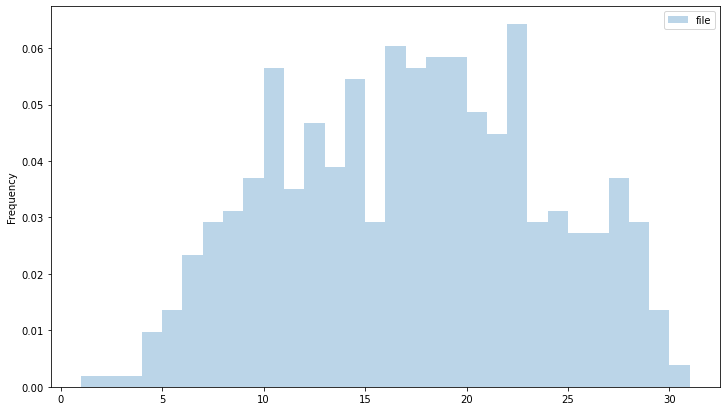

In [11]:
qtd_images.plot.hist(alpha=0.3, density = True, figsize=(12,7), bins=30)

## Selecting People

In [12]:
people = qtd_images.index.values
len(people)

514

random.shuffle(people)
people = people[:25]
people

face_embeddings = face_embeddings.loc[face_embeddings['name'].isin(people)]

## Features Separation

In [13]:
features = pd.DataFrame(face_embeddings['embeddings'].values.tolist(), index = face_embeddings.index)

In [14]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.099673,0.028490,0.205105,0.586825,0.001641,1.195065,9.696318,0.195944,1.285026,0.004162,...,1.476944,0.318303,0.077281,0.078882,0.016868,0.057342,2.142210,0.005792,0.093422,3.583227
1,0.086342,0.131128,0.001552,0.211647,3.386817,5.728385,11.388655,0.007501,0.059680,0.022477,...,2.244408,0.031219,0.064146,0.000102,0.022523,1.805351,0.111746,0.019506,0.000960,0.953488
2,0.104426,0.113521,0.736772,2.401755,0.082944,7.944782,2.828010,0.005558,1.955884,0.003358,...,5.146636,0.234107,0.051913,0.008406,0.017232,0.050210,0.014424,0.008064,0.007714,0.250811
3,0.069987,3.427307,0.000000,2.348149,0.005231,1.902854,7.775493,0.001538,0.382316,0.000116,...,0.054512,4.274777,0.003291,2.458464,0.004770,0.850302,0.034855,0.039880,0.041367,0.716258
4,0.109277,0.121035,2.425440,0.027886,0.004904,0.346190,5.155122,2.818014,2.030220,0.021044,...,5.236780,1.288769,0.001857,0.128116,0.009142,0.021081,1.101728,0.016977,0.019954,0.206595


## Scaling

In [15]:
scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features)

In [16]:
features_scaled

array([[4.25280270e-03, 1.21289985e-03, 8.61822863e-03, ...,
        3.66898649e-04, 3.58578104e-03, 1.63798886e-01],
       [3.68399086e-03, 5.58239494e-03, 6.52185369e-05, ...,
        1.23555146e-03, 3.68359215e-05, 4.35864942e-02],
       [4.45561808e-03, 4.83283391e-03, 3.09581721e-02, ...,
        5.10801957e-04, 2.96086655e-04, 1.14652250e-02],
       ...,
       [2.45877282e-03, 5.67061218e-01, 1.19870006e-03, ...,
        2.42975385e-03, 1.30940604e-01, 1.55417526e-02],
       [5.58358845e-03, 3.50074115e-01, 5.68527353e-04, ...,
        3.01111264e-03, 2.45231601e-02, 1.04589703e-03],
       [7.17009741e-03, 9.83643355e-03, 1.62461266e-03, ...,
        0.00000000e+00, 5.71338290e-04, 5.75097007e-03]])

## Silhuoette Analysis

Look for elbow evaluation

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

import silhouette_paulo

silhouette_values = silhouette_paulo.analyze(features_scaled, [i+2 for i in range(len(people)*2)], show_individual_graphs = False)

# Clustering
See k-means in tensorflow:  https://www.tensorflow.org/api_docs/python/tf/compat/v1/estimator/experimental/KMeans

### Kmeans

In [17]:
from sklearn.cluster import KMeans

In [18]:
model = KMeans(n_clusters=514, verbose = 0, random_state=42)

In [19]:
cluster_labels = model.fit_predict(features_scaled)

In [20]:
features['cluster_Kmeans'] = cluster_labels
features.head(1)

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,cluster_Kmeans
0,0.099673,0.02849,0.205105,0.586825,0.001641,1.195065,9.696318,0.195944,1.285026,0.004162,...,0.318303,0.077281,0.078882,0.016868,0.057342,2.14221,0.005792,0.093422,3.583227,149


### GMM

In [33]:
from sklearn.mixture import GaussianMixture

In [34]:
model = GaussianMixture(n_components = 514)

In [ ]:
cluster_labels = model.fit_predict(features_scaled)

In [ ]:
features['cluster_gmm'] = cluster_labels

### Affinity Propagation

In [21]:
from sklearn.cluster import AffinityPropagation

In [22]:
model = AffinityPropagation()

In [23]:
cluster_labels = model.fit_predict(features_scaled)

c:\users\paulo\.virtualenvs\face_clustering-td_v2agr\lib\site-packages\sklearn\cluster\_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


In [24]:
features['cluster_affinityPropagation'] = cluster_labels

### Spectral Clustering

In [36]:
from sklearn.cluster import SpectralClustering

In [37]:
model = SpectralClustering(n_clusters=514, assign_labels="discretize",random_state=42)

In [ ]:
cluster_labels = model.fit_predict(features_scaled)

In [ ]:
features['cluster_spectralClustering'] = cluster_labels

### AgglomerativeClustering

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
model = AgglomerativeClustering(n_clusters=514)

In [27]:
cluster_labels = model.fit_predict(features_scaled)

In [28]:
features['cluster_agglomerative'] = cluster_labels

## Analyzing Clusters

In [39]:
features_names = features.copy()

In [40]:
features_names['name'] = face_embeddings['name']

In [41]:
features_names.to_csv(f'features_clusters_{backbone}.csv')

In [42]:
features_names.head()

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,cluster_Kmeans,cluster_affinityPropagation,cluster_agglomerative,name
0,0.099673,0.028490,0.205105,0.586825,0.001641,1.195065,9.696318,0.195944,1.285026,0.004162,...,0.016868,0.057342,2.142210,0.005792,0.093422,3.583227,149,-1,226,105112_b
1,0.086342,0.131128,0.001552,0.211647,3.386817,5.728385,11.388655,0.007501,0.059680,0.022477,...,0.022523,1.805351,0.111746,0.019506,0.000960,0.953488,451,-1,226,105112_b
2,0.104426,0.113521,0.736772,2.401755,0.082944,7.944782,2.828010,0.005558,1.955884,0.003358,...,0.017232,0.050210,0.014424,0.008064,0.007714,0.250811,146,-1,226,105112_b
3,0.069987,3.427307,0.000000,2.348149,0.005231,1.902854,7.775493,0.001538,0.382316,0.000116,...,0.004770,0.850302,0.034855,0.039880,0.041367,0.716258,98,-1,10,105112_b
4,0.109277,0.121035,2.425440,0.027886,0.004904,0.346190,5.155122,2.818014,2.030220,0.021044,...,0.009142,0.021081,1.101728,0.016977,0.019954,0.206595,146,-1,226,105112_b


## Evaluation Classification
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [43]:
cluster_cols = [c for c in features_names.columns if str(c).startswith('cluster')]

In [44]:
labels_true = features_names['name'].values

In [45]:
dict_results = {}
for col in cluster_cols:
    labels_pred = features_names[col].values
    
    dict_results[col] = [metrics.homogeneity_score(labels_true,labels_pred),
                        metrics.completeness_score(labels_true, labels_pred),
                        metrics.v_measure_score(labels_true, labels_pred)]

In [46]:
df_results = pd.DataFrame.from_dict(dict_results, orient='index', columns=['Homogeneity Score', 'Completeness Score', 'V-Measure'])
df_results

,Homogeneity Score,Completeness Score,V-Measure
cluster_Kmeans,9.392060e-01,0.949768,9.444576e-01
cluster_affinityPropagation,-5.087186e-17,1.000000,-1.017437e-16
cluster_agglomerative,9.532640e-01,0.961188,9.572094e-01


In [47]:
df_results.to_csv(f'results_{backbone}.csv')